In [2]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
# df = pd.read_csv('../test_audio_CumulativeSonoBatch_v4.4.5.txt', sep='\t')
df = pd.read_csv('../test_audio_Parameters_v4.4.5.txt', sep='\t')
df.to_csv('sonobat_pulse_features_for_30_recordings.csv')

In [4]:
df

,Path,Filename,TimeInFile,PrecedingIntrvl,CallsPerSec,CallDuration,Fc,HiFreq,LowFreq,Bndwdth,...,RelPwr2ndTo1st,RelPwr3rdTo1st,ParentDir,NextDirUp,Version,Filter,Preemphasis,MinAccpQuality,MaxSegLngth,Max#CallsConsidered
0,C:\Users\Owner\Desktop\bats\src\test_audio\bar...,barn1_D20220723T000059m428-Coto.wav,515,48,9.990783,5.800177,30.721317,46.543086,24.877343,21.665743,...,0.268145,0.0,test_audio,src,4.4.5,5 kHz,medium,0.8,0.5 sec,32
1,C:\Users\Owner\Desktop\bats\src\test_audio\bar...,barn1_D20220723T000059m428-Coto.wav,469,45,9.990783,5.934510,31.952577,56.529694,30.871884,25.657810,...,0.550883,0.0,test_audio,src,4.4.5,5 kHz,medium,0.8,0.5 sec,32
2,C:\Users\Owner\Desktop\bats\src\test_audio\bar...,barn1_D20220723T000059m428-Coto.wav,865,159,9.990783,5.335590,31.774967,57.626177,30.870894,26.755283,...,0.656476,0.0,test_audio,src,4.4.5,5 kHz,medium,0.8,0.5 sec,32
3,C:\Users\Owner\Desktop\bats\src\test_audio\bar...,barn1_D20220723T000059m428-Coto.wav,3995,374,9.990783,6.510984,32.332951,56.705444,30.580920,26.124524,...,0.598212,0.0,test_audio,src,4.4.5,5 kHz,medium,0.8,0.5 sec,32
4,C:\Users\Owner\Desktop\bats\src\test_audio\bar...,barn1_D20220723T000059m428-Coto.wav,107,25,9.990783,4.034267,19.629609,43.862460,19.424983,24.437478,...,0.586246,0.0,test_audio,src,4.4.5,5 kHz,medium,0.8,0.5 sec,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,C:\Users\Owner\Desktop\bats\src\test_audio\bar...,barn1_D20220723T215748m724-Anpa.wav,643,110,6.698429,6.018848,29.955968,63.004498,29.835913,33.168584,...,0.553432,0.0,test_audio,src,4.4.5,5 kHz,medium,0.8,0.5 sec,32
689,C:\Users\Owner\Desktop\bats\src\test_audio\bar...,barn1_D20220723T215748m724-Anpa.wav,2674,183,6.698429,5.956305,29.888851,63.800558,29.508762,34.291796,...,0.550367,0.0,test_audio,src,4.4.5,5 kHz,medium,0.8,0.5 sec,32
690,C:\Users\Owner\Desktop\bats\src\test_audio\bar...,barn1_D20220723T215748m724-Anpa.wav,2201,599,6.698429,3.897232,30.208108,62.016239,30.150512,31.865727,...,0.450351,0.0,test_audio,src,4.4.5,5 kHz,medium,0.8,0.5 sec,32
691,C:\Users\Owner\Desktop\bats\src\test_audio\bar...,barn1_D20220723T215748m724-Anpa.wav,177,174,6.698429,5.609381,29.222841,53.043077,28.985910,24.057167,...,0.345128,0.0,test_audio,src,4.4.5,5 kHz,medium,0.8,0.5 sec,32


In [5]:
df2 = df.loc[:,'CallsPerSec':'RelPwr3rdTo1st']
df2['Individual'] = df.Filename.str[6:-9]
df2['Species'] = df.Filename.str[-8:-4]

cols = df2.columns.tolist()
cols = cols[-2:] + cols[:-2]
df2 = df2[cols] 

df2

,Individual,Species,CallsPerSec,CallDuration,Fc,HiFreq,LowFreq,Bndwdth,FreqMaxPwr,PrcntMaxAmpDur,...,PreFc3000Residue,KneeToFcResidue,Kn-FcCurviness,meanKn-FcCurviness,Kn-FcCurvinessTrndSlp,Quality,HiFminusStartF,FcMinusEndF,RelPwr2ndTo1st,RelPwr3rdTo1st
0,D20220723T000059m428,Coto,9.990783,5.800177,30.721317,46.543086,24.877343,21.665743,37.085534,41.304802,...,0.595328,0.554601,0.029407,0.000204,0.001672,0.862040,0.000000,5.843974,0.268145,0.0
1,D20220723T000059m428,Coto,9.990783,5.934510,31.952577,56.529694,30.871884,25.657810,38.313807,45.813232,...,0.292377,0.615446,0.147733,0.000966,-0.000723,0.847127,0.000000,1.080693,0.550883,0.0
2,D20220723T000059m428,Coto,9.990783,5.335590,31.774967,57.626177,30.870894,26.755283,34.316481,70.198725,...,0.347766,0.309295,0.104749,0.000911,0.000661,0.830255,0.283589,0.904073,0.656476,0.0
3,D20220723T000059m428,Coto,9.990783,6.510984,32.332951,56.705444,30.580920,26.124524,38.905409,53.293774,...,0.010113,0.000354,0.025781,0.001172,-0.006020,0.857169,0.000000,1.752031,0.598212,0.0
4,D20220723T000059m428,Coto,9.990783,4.034267,19.629609,43.862460,19.424983,24.437478,41.959867,16.908205,...,0.087332,0.085957,-0.004169,-0.000034,0.002262,0.854222,0.000000,0.204626,0.586246,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,D20220723T215748m724,Anpa,6.698429,6.018848,29.955968,63.004498,29.835913,33.168584,30.222921,87.419525,...,0.926078,1.131436,0.166277,0.001014,-0.000091,0.872064,0.000000,0.120055,0.553432,0.0
689,D20220723T215748m724,Anpa,6.698429,5.956305,29.888851,63.800558,29.508762,34.291796,30.301806,74.404991,...,0.863278,1.095236,0.155008,0.001202,-0.000539,0.886589,0.000000,0.061400,0.550367,0.0
690,D20220723T215748m724,Anpa,6.698429,3.897232,30.208108,62.016239,30.150512,31.865727,30.377776,88.305001,...,0.449759,0.399759,0.233327,0.002811,0.001929,0.908827,0.000000,-0.182502,0.450351,0.0
691,D20220723T215748m724,Anpa,6.698429,5.609381,29.222841,53.043077,28.985910,24.057167,30.454747,80.925648,...,0.087145,0.054167,0.038926,0.000683,-0.000083,0.875600,0.000000,0.101428,0.345128,0.0


In [6]:
features = df2.loc[:,'CallsPerSec':].to_numpy()
features

array([[ 9.990783,  5.800177, 30.721317, ...,  5.843974,  0.268145,
         0.      ],
       [ 9.990783,  5.93451 , 31.952577, ...,  1.080693,  0.550883,
         0.      ],
       [ 9.990783,  5.33559 , 31.774967, ...,  0.904073,  0.656476,
         0.      ],
       ...,
       [ 6.698429,  3.897232, 30.208108, ..., -0.182502,  0.450351,
         0.      ],
       [ 6.698429,  5.609381, 29.222841, ...,  0.101428,  0.345128,
         0.      ],
       [ 6.698429,  5.077084, 30.750668, ..., -0.172348,  0.643165,
         0.      ]])

In [7]:
labels = df2.Species.to_numpy()
labels

array(['Coto', 'Coto', 'Coto', 'Coto', 'Coto', 'Coto', 'Coto', 'Coto',
       'Coto', 'Coto', 'Coto', 'Coto', 'Coto', 'Coto', 'Coto', 'Coto',
       'Coto', 'Coto', 'Coto', 'Coto', 'Coto', 'Coto', 'Coto', 'Coto',
       'Coto', 'Coto', 'Coto', 'Coto', 'Coto', 'Coto', 'Coto', 'Coto',
       'Laci', 'Laci', 'Laci', 'Laci', 'Laci', 'Laci', 'Laci', 'Laci',
       'Laci', 'Laci', 'Laci', 'Laci', 'Laci', 'Laci', 'Laci', 'Laci',
       'Laci', 'Laci', 'Laci', 'Laci', 'Laci', 'Laci', 'Laci', 'Laci',
       'Laci', 'Laci', 'Laci', 'Laci', 'Laci', 'Laci', 'Laci', 'Laci',
       'Laci', 'Laci', 'Laci', 'Laci', 'Laci', 'Laci', 'Laci', 'Laci',
       'Laci', 'Laci', 'Laci', 'Laci', 'Laci', 'Laci', 'Laci', 'Laci',
       'Laci', 'Laci', 'Laci', 'Laci', 'Laci', 'Laci', 'Laci', 'Coto',
       'Coto', 'Coto', 'Coto', 'Coto', 'Coto', 'Coto', 'Coto', 'Coto',
       'Coto', 'Coto', 'Coto', 'Coto', 'Coto', 'Coto', 'Coto', 'Coto',
       'Coto', 'Coto', 'Coto', 'Coto', 'Coto', 'Coto', 'Coto', 'Coto',
      

<AxesSubplot:>

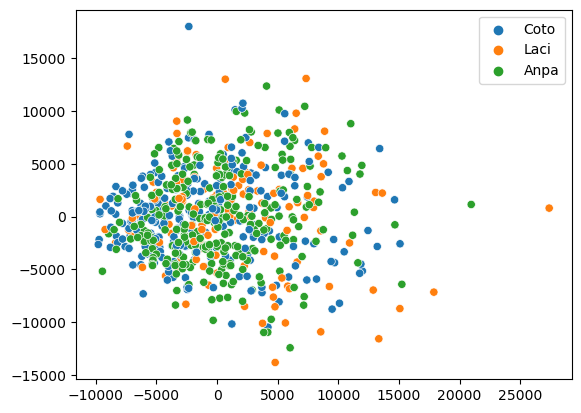

In [8]:
X, Y = PCA(n_components=2).fit_transform(features).T

sns.scatterplot(
        x=X,
        y=Y,
        hue=[label for label in labels],
        # hue=[d["det_prob"] for d in detections],
    )

In [9]:
df2.Individual.value_counts()


D20220723T000059m428    32
D20220723T215348m264    32
D20220723T005607m172    32
D20220723T023116m444    32
D20220723T024503m939    32
D20220723T033517m645    32
D20220723T212734m674    32
D20220723T205606m183    32
D20220723T204240m923    32
D20220723T204111m278    32
D20220723T202257m087    32
D20220723T025743m408    31
D20220723T001918m846    29
D20220723T215748m724    29
D20220723T195414m434    27
D20220723T203621m070    27
D20220723T200740m009    27
D20220723T002346m783    26
D20220723T212238m208    25
D20220723T203229m276    21
D20220723T205521m092    19
D20220723T202041m463    17
D20220723T194741m510    15
D20220723T194858m819    14
D20220723T045437m130    11
D20220723T205450m955    10
D20220723T194107m488     7
D20220723T190505m879     4
D20220723T210413m486     1
D20220723T042858m806     1
Name: Individual, dtype: int64

In [10]:
coto_df = df2[df2.Species == 'Coto']
coto_feats = coto_df.loc[:,'CallsPerSec':].to_numpy()
coto_labels = coto_df.Individual.to_numpy()

<AxesSubplot:>

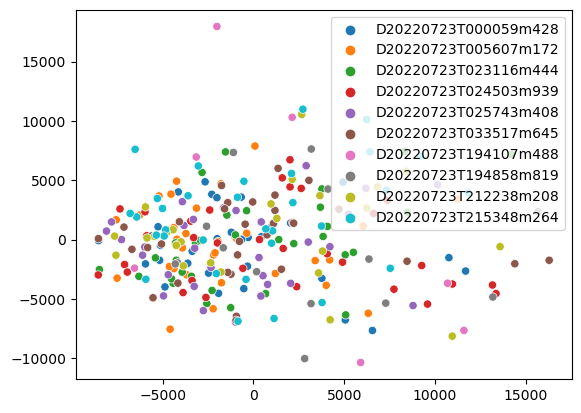

In [11]:
X, Y = PCA(n_components=2).fit_transform(coto_feats).T

sns.scatterplot(
        x=X,
        y=Y,
        hue=[label for label in coto_labels]
    )

In [22]:
small_df = df2.loc[:,'CallDuration':'KneeToFcSlope']
small_df['Individual'] = df2.Individual
small_df['Species'] = df2.Species

cols = small_df.columns.tolist()
cols = cols[-2:] + cols[:-2]
small_df = small_df[cols]

small_df

,Individual,Species,CallDuration,Fc,HiFreq,LowFreq,Bndwdth,FreqMaxPwr,PrcntMaxAmpDur,TimeFromMaxToFc,...,EndF,DominantSlope,SlopeAtFc,StartSlope,EndSlope,SteepestSlope,LowestSlope,TotalSlope,HiFtoKnSlope,KneeToFcSlope
0,D20220723T000059m428,Coto,5.800177,30.721317,46.543086,24.877343,21.665743,37.085534,41.304802,1.887562,...,24.877343,5.240442,1.069545,-0.430824,-1.834016,8.328710,0.096253,4.702201,0.548744,5.081006
1,D20220723T000059m428,Coto,5.934510,31.952577,56.529694,30.871884,25.657810,38.313807,45.813232,3.043855,...,30.871884,4.544984,0.999816,-2.104868,-5.384712,10.588624,0.000366,4.730895,7.924472,2.705992
2,D20220723T000059m428,Coto,5.335590,31.774967,57.626177,30.870894,26.755283,34.316481,70.198725,1.464081,...,30.870894,4.343650,1.623519,-1.245990,-4.660829,16.314799,0.165389,5.522359,11.261107,2.783503
3,D20220723T000059m428,Coto,6.510984,32.332951,56.705444,30.580920,26.124524,38.905409,53.293774,2.123337,...,30.580920,4.398744,1.570330,-0.191845,-0.879799,17.377683,0.038186,5.381194,5.685353,1.736781
4,D20220723T000059m428,Coto,4.034267,19.629609,43.862460,19.424983,24.437478,41.959867,16.908205,3.230535,...,19.424983,2.271163,2.255931,-4.851547,-2.233276,9.498671,1.756533,6.725727,2.507910,7.336782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,D20220723T215748m724,Anpa,6.018848,29.955968,63.004498,29.835913,33.168584,30.222921,87.419525,0.464090,...,29.835913,0.748006,0.467730,-14.784413,-0.371867,13.133185,0.582025,5.580817,10.333117,3.984857
689,D20220723T215748m724,Anpa,5.956305,29.888851,63.800558,29.508762,34.291796,30.301806,74.404991,1.450617,...,29.827451,6.387029,0.009886,-12.155223,-0.273344,15.201841,0.031802,5.923462,10.230423,2.342415
690,D20220723T215748m724,Anpa,3.897232,30.208108,62.016239,30.150512,31.865727,30.377776,88.305001,0.329175,...,30.390610,7.806477,0.874606,-13.311260,1.093627,13.318861,1.194400,8.903626,11.951542,6.186857
691,D20220723T215748m724,Anpa,5.609381,29.222841,53.043077,28.985910,24.057167,30.454747,80.925648,0.945878,...,29.121413,3.258720,0.642373,-7.176476,-0.692377,12.398784,0.036916,4.927745,6.249047,1.295421


<AxesSubplot:>

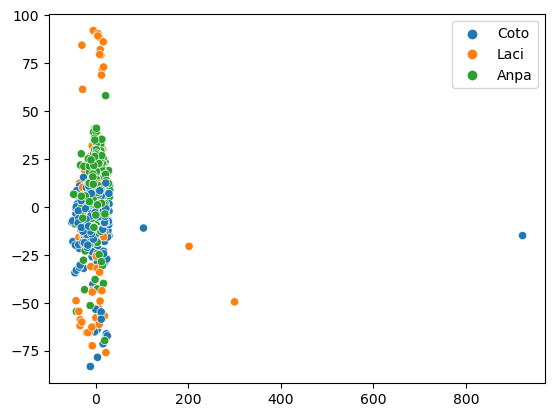

In [13]:
small_feats = small_df.loc[:,'CallDuration':].to_numpy()
small_labels = small_df.Species.to_numpy()

X, Y = PCA(n_components=2).fit_transform(small_feats).T

sns.scatterplot(
        x=X,
        y=Y,
        hue=[label for label in small_labels]
    )

In [14]:
X = small_feats
Y = small_labels

for i in [5, 10, 20, 30]:
    X_embedded = TSNE(n_components=2,
                    learning_rate='auto',
                    init='random',
                    perplexity=i).fit_transform(X)
    fig = px.scatter(X_embedded, x=0, y=1, color=Y)
    fig.show()

In [15]:
X = small_feats
Y = small_labels

i = 20
X_embedded = TSNE(n_components=2,
                learning_rate='auto',
                init='random',
                perplexity=i).fit_transform(X)
fig = px.scatter(X_embedded, x=0, y=1, color=Y)
fig.show()

In [16]:
anpa_small_df = small_df[small_df.Species == 'Anpa']
anpa_small_feats = anpa_small_df.loc[:,'CallDuration':].to_numpy()
anpa_small_labels = anpa_small_df.Individual.to_numpy()

<AxesSubplot:>

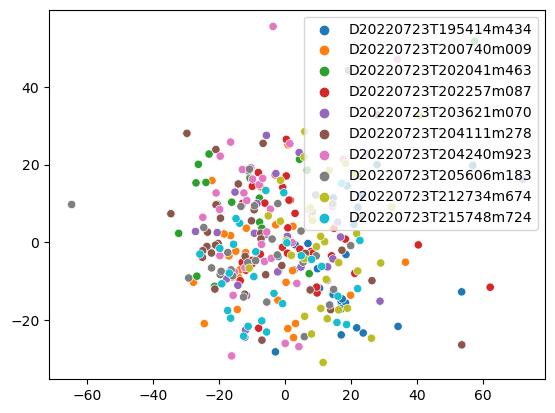

In [17]:
X, Y = PCA(n_components=2).fit_transform(anpa_small_feats).T

sns.scatterplot(
        x=X,
        y=Y,
        hue=[label for label in anpa_small_labels]
    )

In [18]:
X = anpa_small_feats
Y = anpa_small_labels

for i in [5, 10, 20, 30]:
    X_embedded = TSNE(n_components=2,
                    learning_rate='auto',
                    init='random',
                    perplexity=i).fit_transform(X)
    fig = px.scatter(X_embedded, x=0, y=1, color=Y)
    fig.show()

In [23]:
from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(small_feats)

In [24]:
# plot the 3 clusters
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[y_km == 2, 0], X[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
# plt.grid()
plt.show()

IndexError: boolean index did not match indexed array along dimension 0; dimension is 287 but corresponding boolean dimension is 693